<a href="https://colab.research.google.com/github/Bonnnana/Introduction-to-Data-Science/blob/main/Lab/Lab_2(15_11_2024_08_00).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/spotify_songs.csv')
data_cp = data.copy()
data.head()

danceability  energy  loudness  speechiness  acousticness  \
0         0.748   0.916    -2.634       0.0583        0.1020   
1         0.726     NaN    -4.969       0.0373        0.0724   
2         0.675   0.931    -3.432       0.0742        0.0794   
3         0.718   0.930    -3.778       0.1020        0.0287   
4         0.650   0.833    -4.672       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo genre  
0          0.000000    0.0653    0.518  122.036   pop  
1               NaN    0.3570    0.693   99.972   pop  
2               NaN    0.1100    0.613  124.008   pop  
3          0.000009    0.2040    0.277      NaN   pop  
4          0.000000    0.0833    0.725  123.976   pop

Preprocess the input and the output variables appropriately.

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data['encoded_genre'] = enc.fit_transform(data[data.columns[-1]])

print(data[['genre', 'encoded_genre']].tail())

X = data[data.columns[:-2]]
Y = data['encoded_genre']

      genre  encoded_genre
32828   edm              0
32829   edm              0
32830   edm              0
32831   edm              0
32832   edm              0


In [ ]:
from sklearn.preprocessing import StandardScaler

Explore the dataset using visualizations of your choice.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

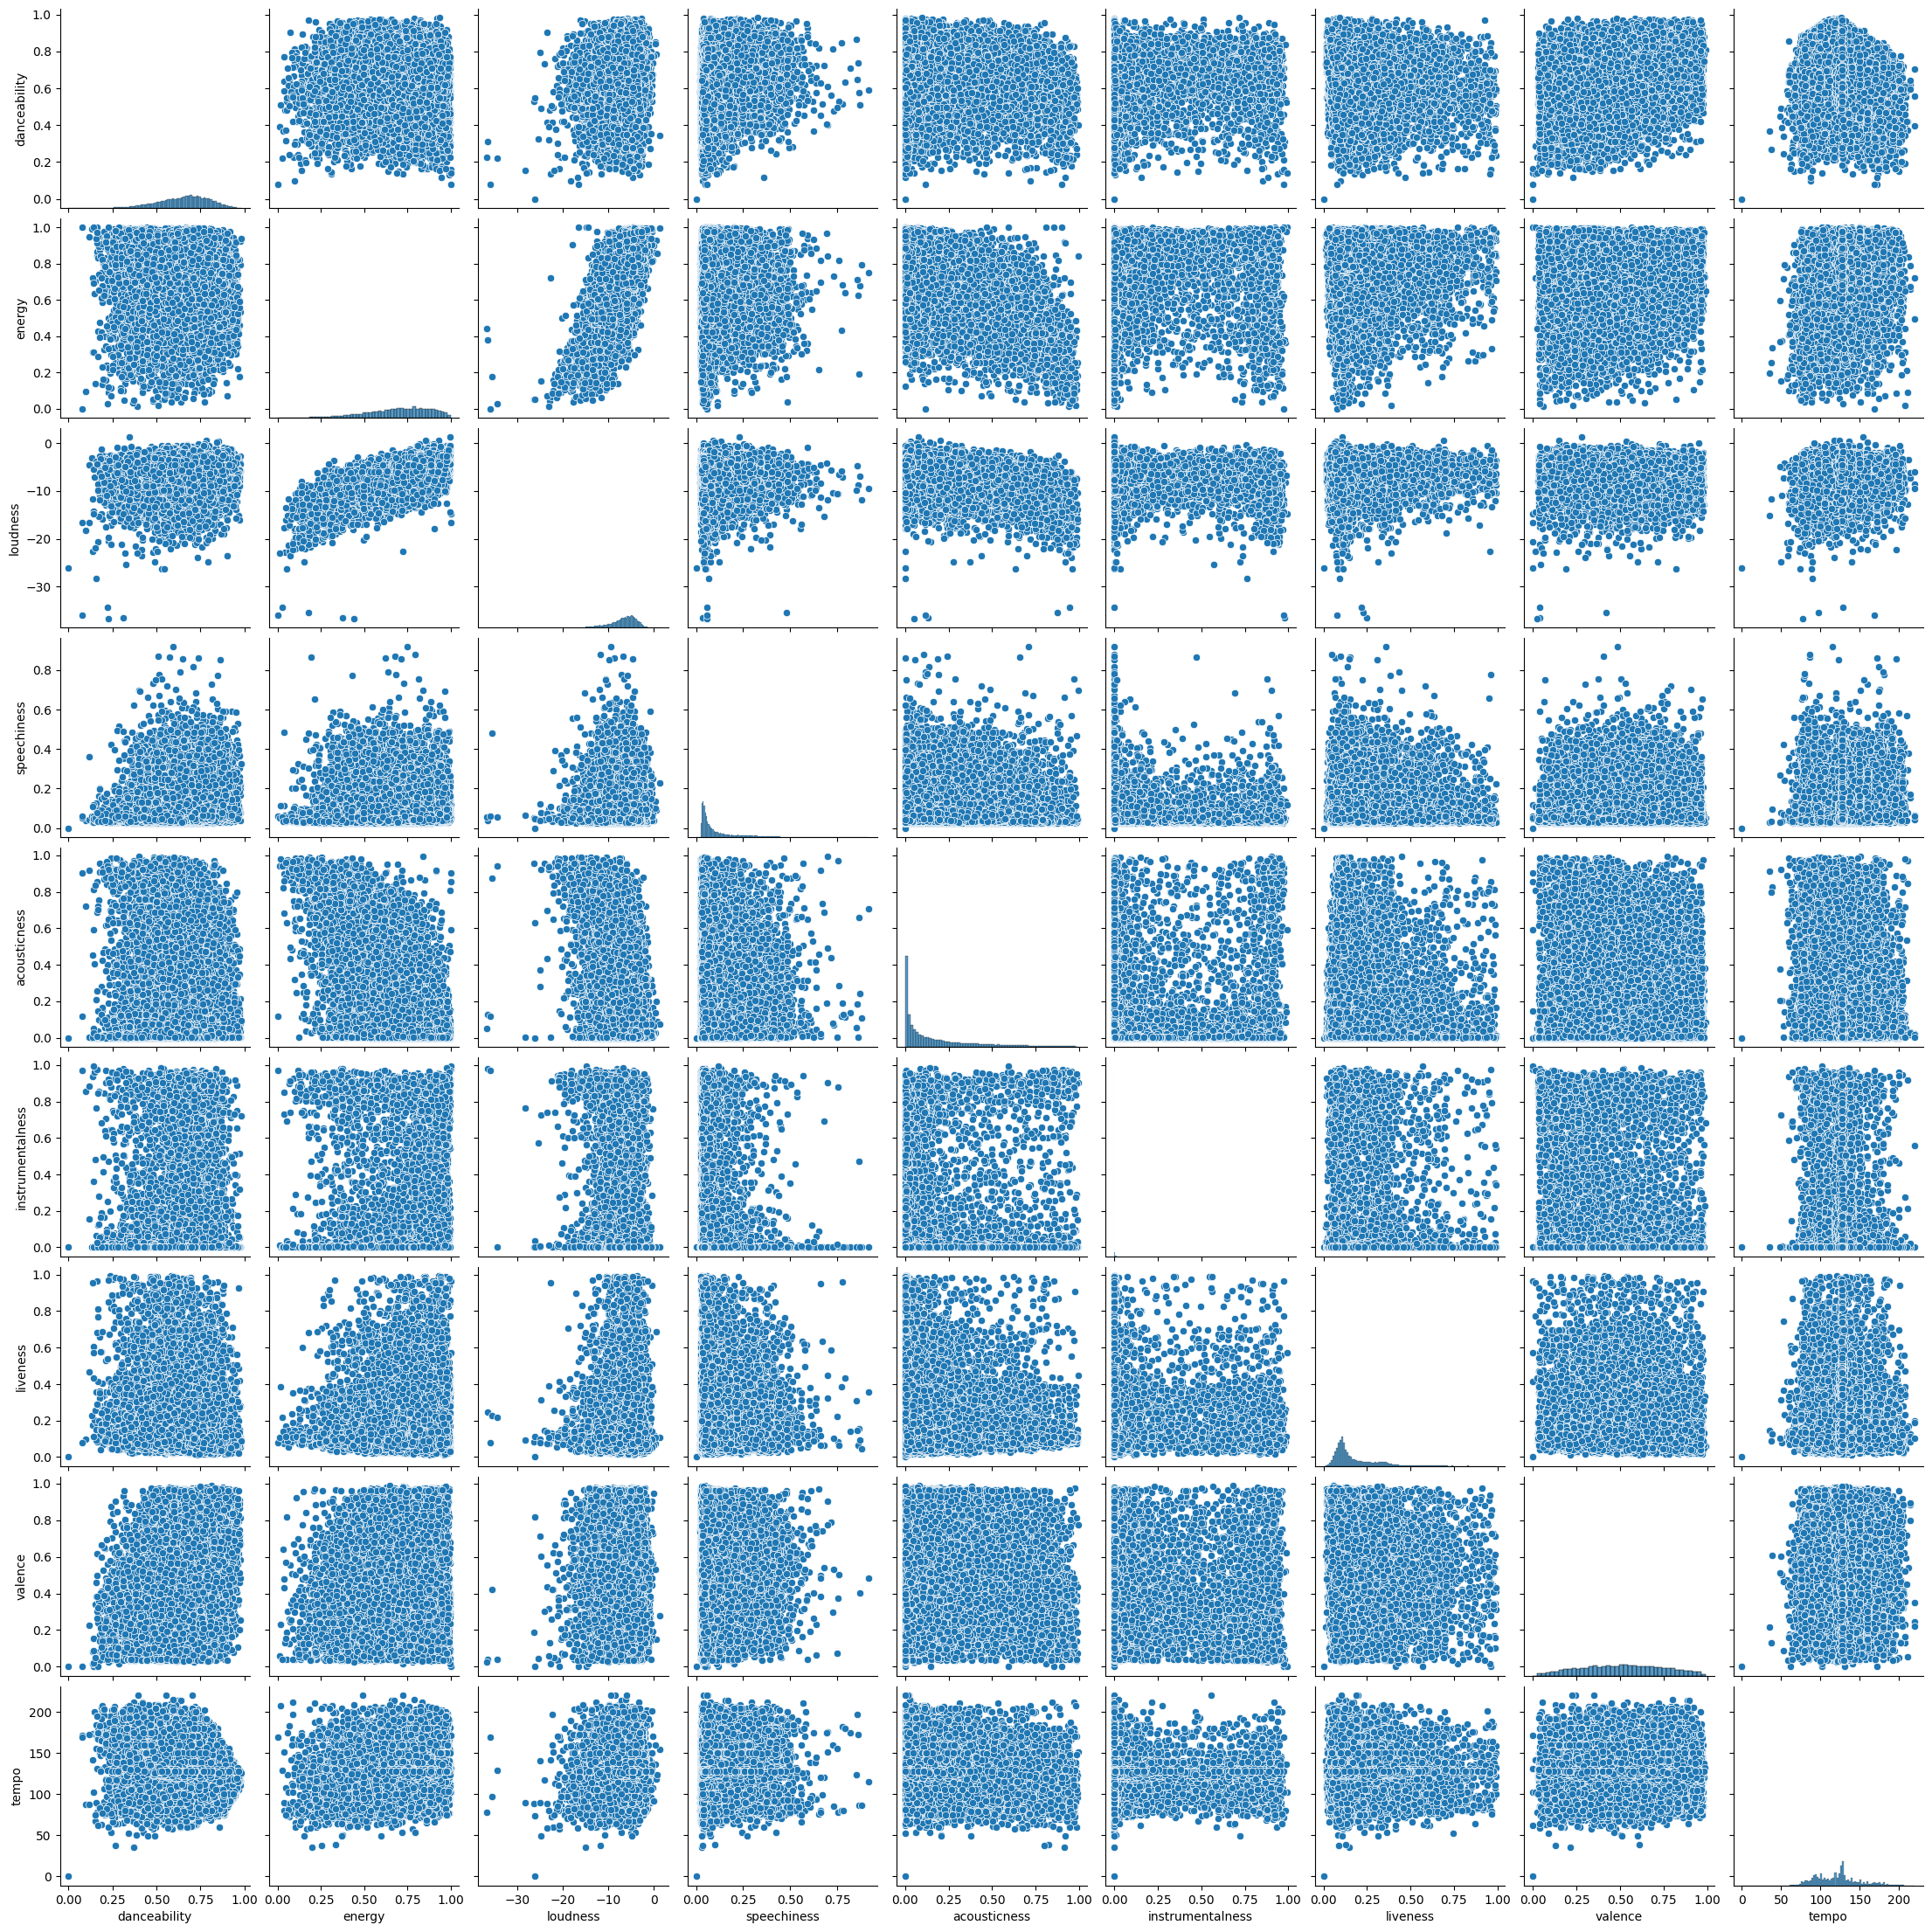

In [ ]:
sns.pairplot(data.drop('encoded_genre', axis=1))
plt.show()

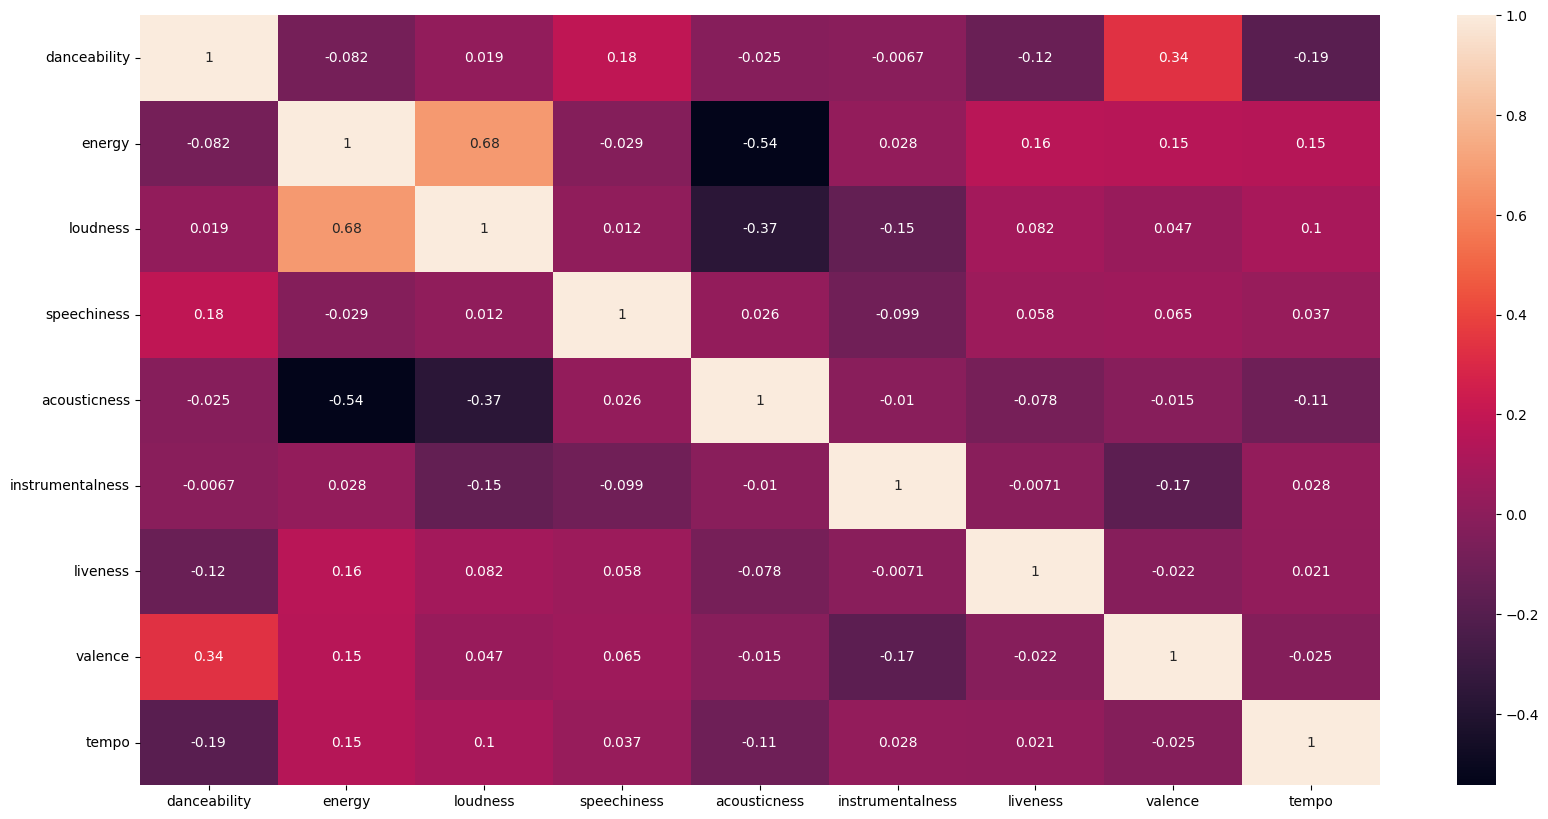

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.drop(columns=['genre', 'encoded_genre']).corr(), annot=True)
plt.show()

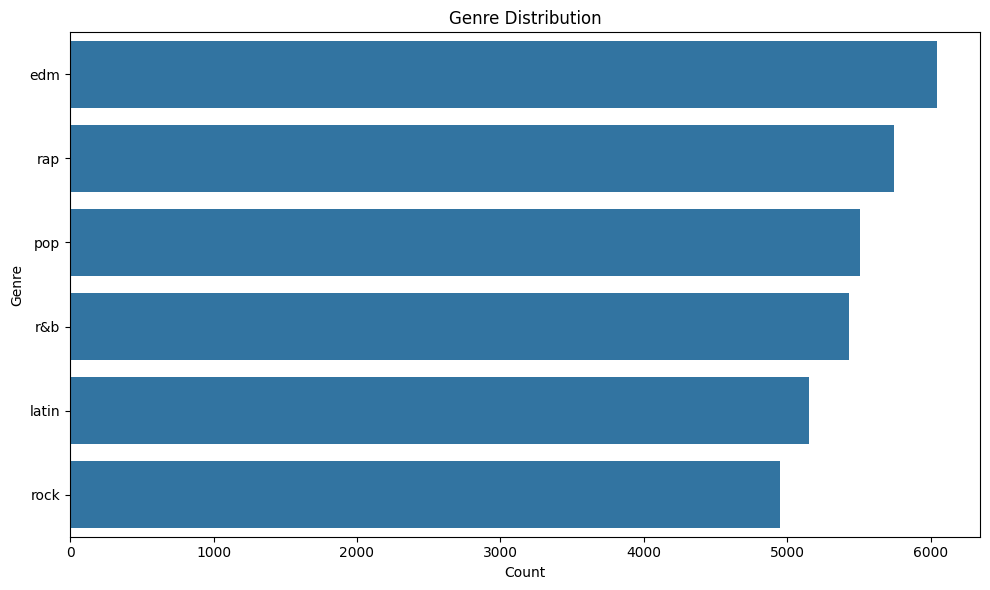

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=data, order=data['genre'].value_counts().index)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

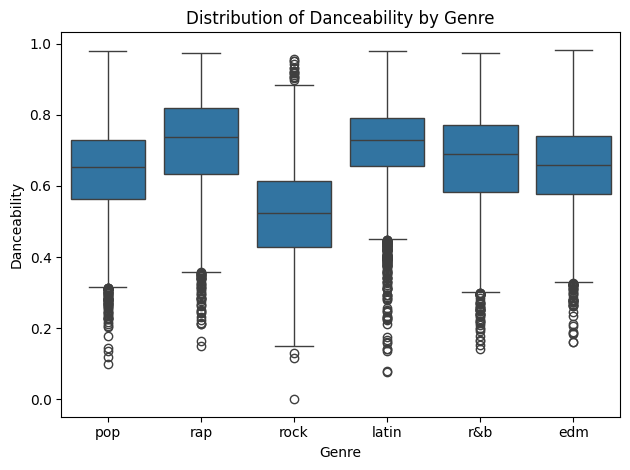

In [ ]:
sns.boxplot(data=data, x='genre', y='danceability')
plt.title('Distribution of Danceability by Genre')
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.tight_layout()
plt.show()

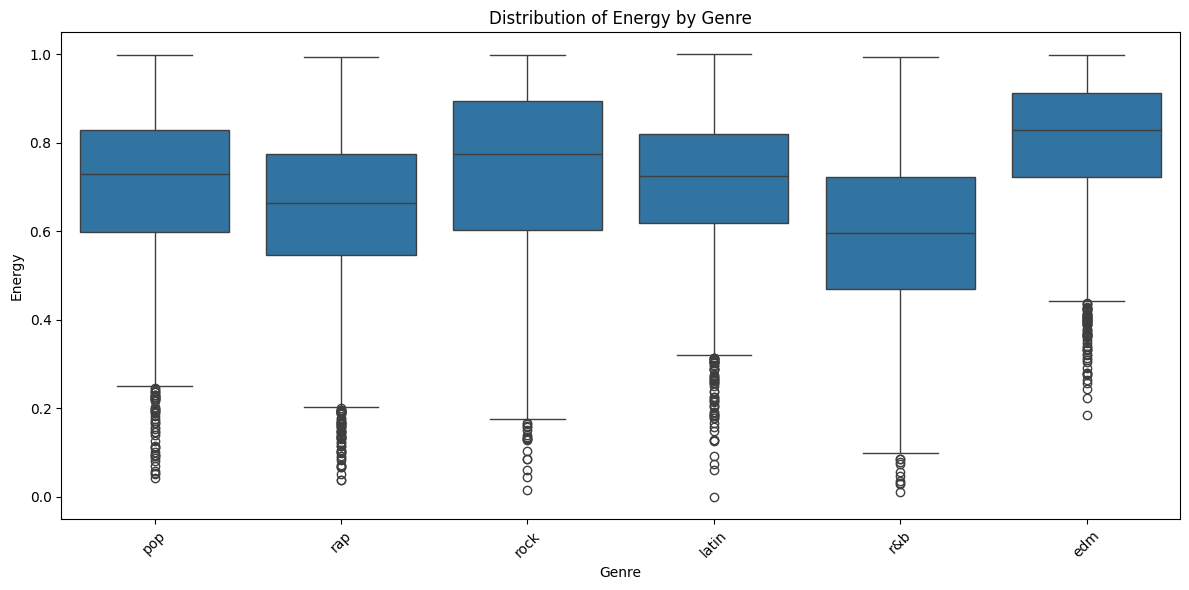

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='energy', data=data)
plt.title('Distribution of Energy by Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

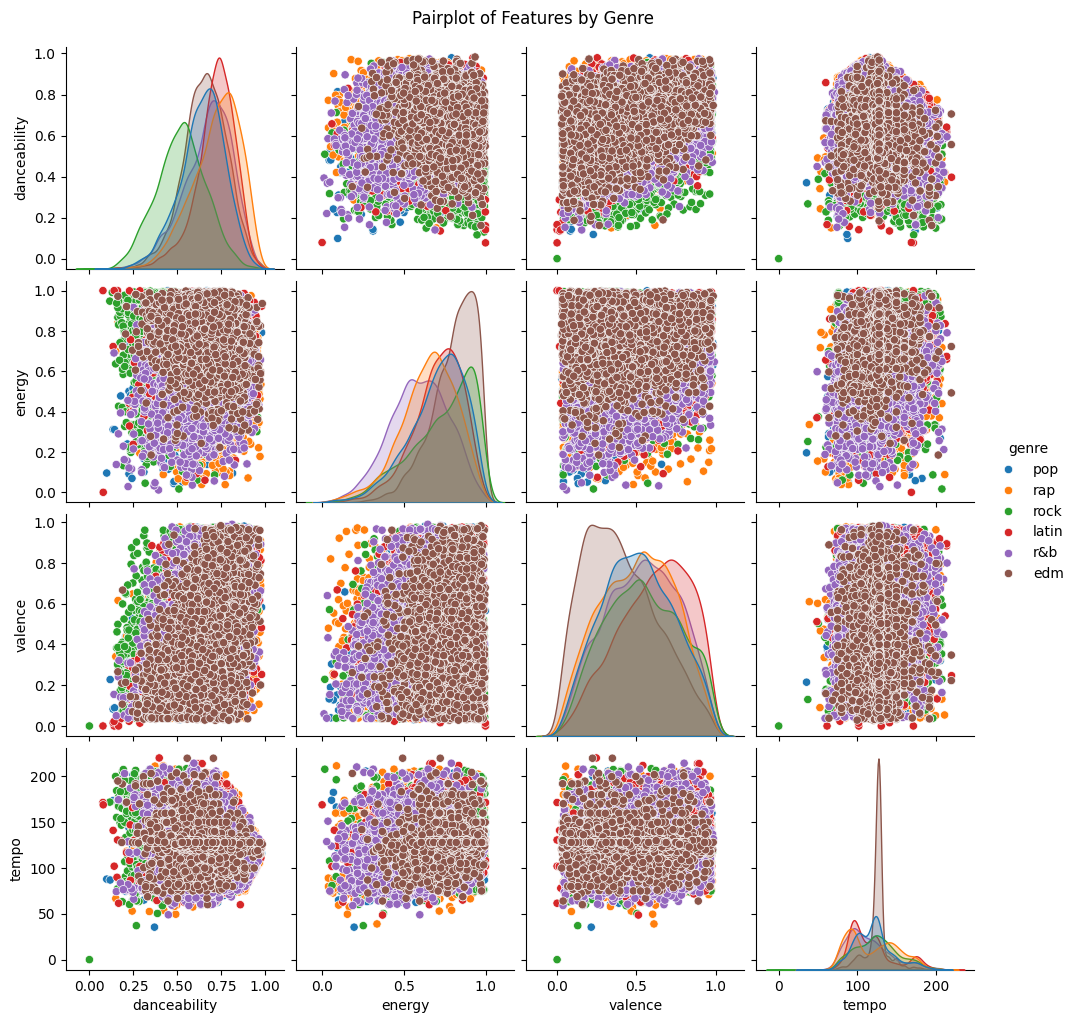

In [ ]:
sns.pairplot(data, vars=['danceability', 'energy', 'valence', 'tempo'], hue='genre', height=2.5)
plt.suptitle('Pairplot of Features by Genre', y=1.02)
plt.show()

Check if the dataset is balanced.

In [ ]:
class_distribution = Y.value_counts()
print(class_distribution)
class_percentage = (Y.value_counts() / len(data)) * 100
print(class_percentage)

encoded_genre
0    6043
4    5746
2    5507
3    5431
1    5155
5    4951
Name: count, dtype: int64
encoded_genre
0    18.405263
4    17.500685
2    16.772759
3    16.541285
1    15.700667
5    15.079341
Name: count, dtype: float64


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
(data.drop('encoded_genre', axis=1).isnull().sum() / len(data)) *100

danceability        11.153413
energy              34.297810
loudness            23.208357
speechiness          7.190936
acousticness         2.722870
instrumentalness    19.705784
liveness             9.094509
valence             22.809369
tempo               19.970761
genre                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno

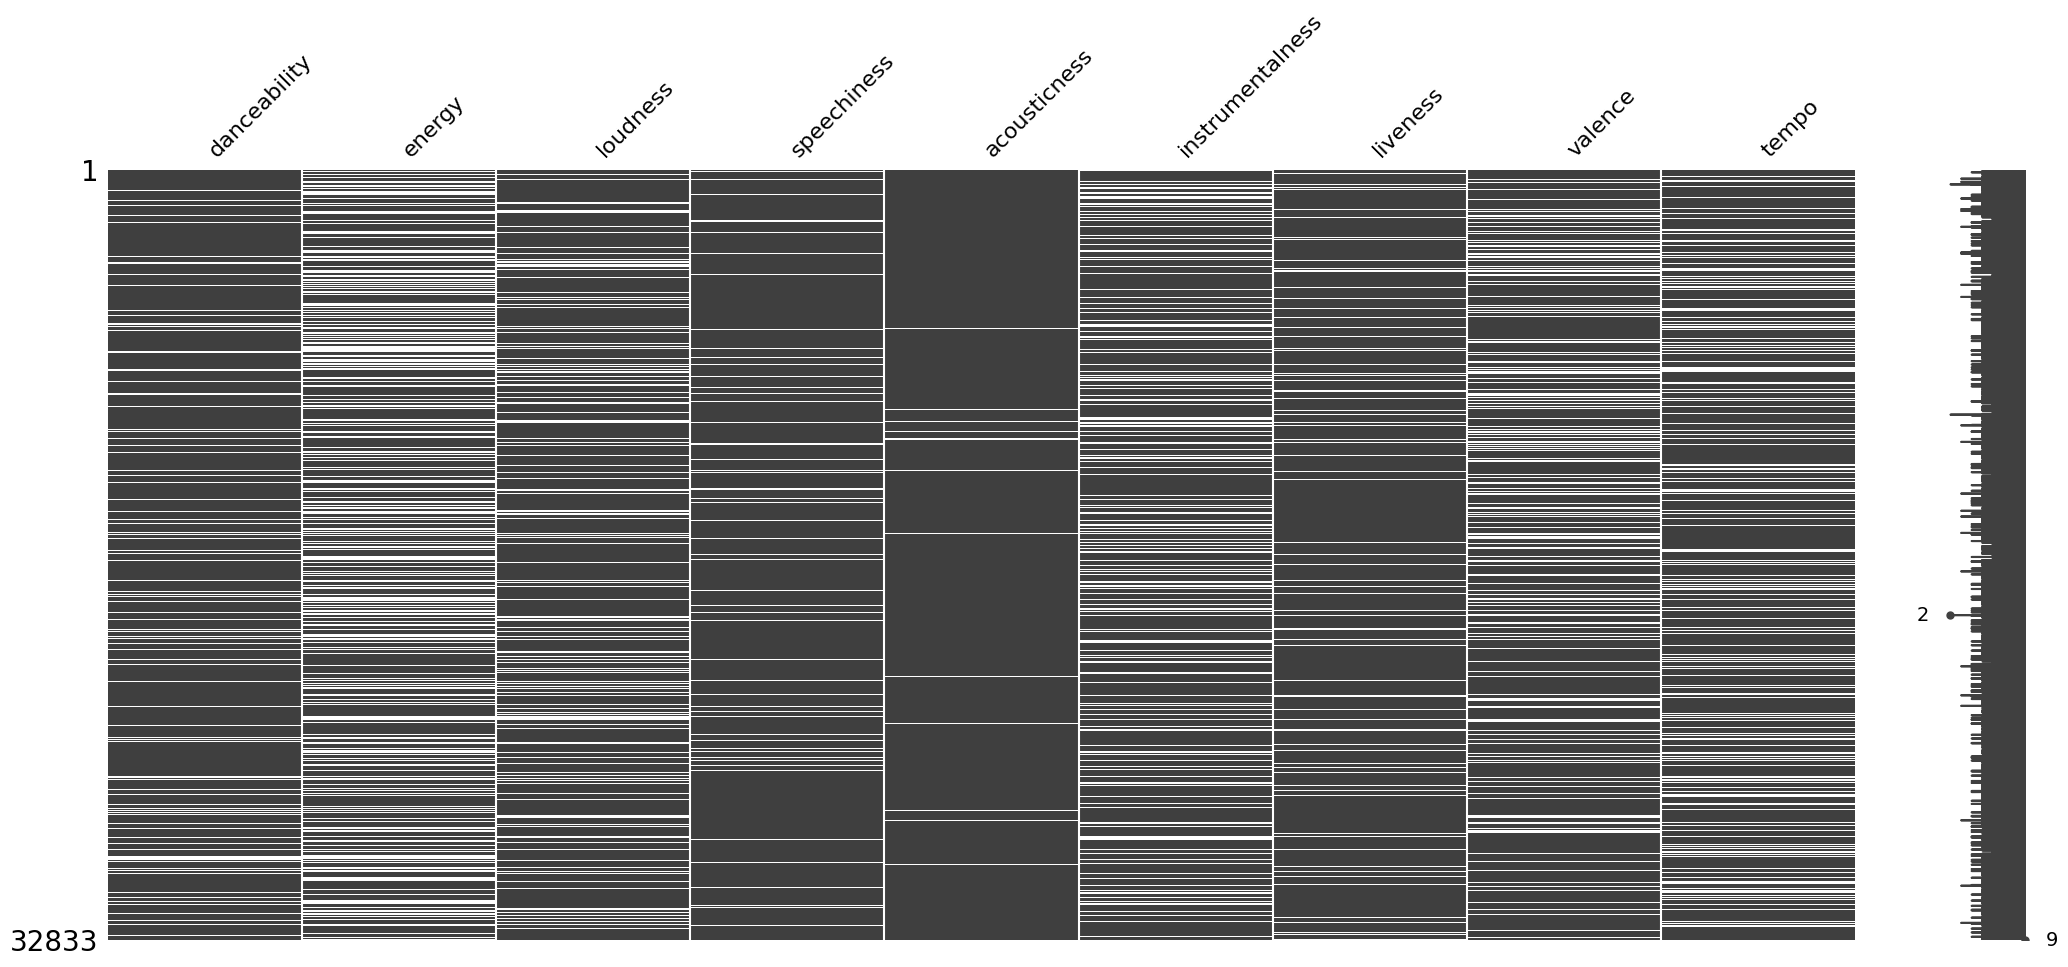

<Figure size 2000x1000 with 0 Axes>

In [ ]:
msno.matrix(X)
plt.figure(figsize=(20, 10))
plt.show()

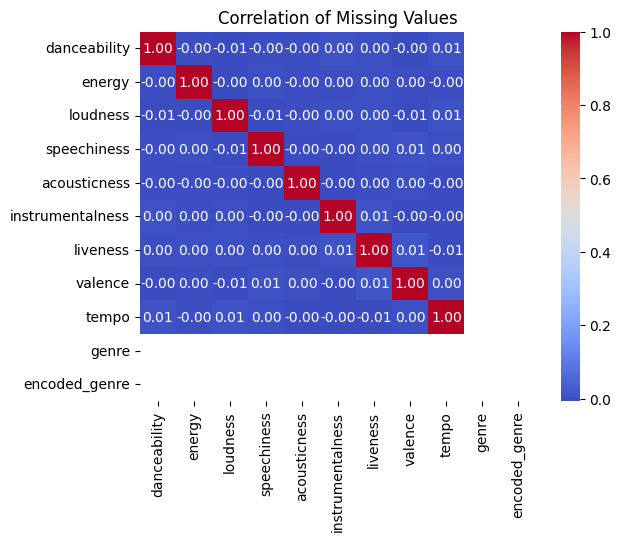

In [ ]:
missing_corr = data.isnull().corr()
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Missing Values")
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
from sklearn.impute import  KNNImputer

In [ ]:
for col in data.drop('genre', axis=1).columns:
    data[col] = data[col].fillna(data[col].median())

In [ ]:
data.isnull().sum()
data.to_csv('data_genre_new.csv')

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data[data.columns[:-2]], data['encoded_genre'], test_size=0.2)
x_train

danceability  energy  loudness  speechiness  acousticness  \
24879         0.672   0.461    -6.164       0.3020       0.07570   
9092          0.854   0.667    -6.513       0.3280       0.26900   
11166         0.672   0.619    -6.692       0.2330       0.11900   
8114          0.502   0.721    -6.164       0.3170       0.25500   
11942         0.684   0.563    -6.164       0.1150       0.15100   
...             ...     ...       ...          ...           ...   
28508         0.672   0.721    -5.098       0.0707       0.00835   
551           0.810   0.847    -4.759       0.0557       0.01810   
11569         0.625   0.721    -9.095       0.0251       0.04900   
29967         0.708   0.588    -6.460       0.0933       0.20600   
20148         0.847   0.982    -6.164       0.1110       0.00128   

       instrumentalness  liveness  valence    tempo  
24879          0.000000    0.1090    0.512   90.995  
9092           0.000000    0.1100    0.666  100.979  
11166          0.000000    0.0880    0.512  138.109  
8114           0.000000    0.6500    0.739  169.021  
11942          0.000016    0.1210    0.512  155.145  
...                 ...       ...      ...      ...  
28508          0.715000    0.5130    0.230  121.978  
551            0.738000    0.0609    0.630  120.004  
11569          0.000016    0.0939    0.360  101.355  
29967          0.000006    0.1060    0.262  121.978  
20148          0.700000    0.2930    0.799  121.978  

[26266 rows x 9 columns]

## Feature Scaling
Standardize the features appropriately.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train = std_scaler.transform(x_train)
x_test = std_scaler.transform(x_test)

## Model Selection

Choose and train an approriate model for the given task.

In [ ]:
!pip install catboost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=500,n_jobs=-1 , verbose=1,learning_rate=0.25)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:13:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

Use the trained model to make predictions for the test set.

In [ ]:
y_pred = model.predict(x_test)

Assess the performance of the model by using different classification metrics.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
import numpy as np
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
feature_importance

array([0.13239117, 0.10087322, 0.09374531, 0.13959365, 0.10094839,
       0.10720086, 0.0800148 , 0.09532616, 0.14990647], dtype=float32)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.4915486523526725


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
data2 = pd.read_csv('/content/data_genre_new.csv')
x2_train, x2_test, y2_train, y2_test = train_test_split(data2[data2.columns[:-2]], data2['encoded_genre'], test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(x2_train)
x2_train = scaler2.transform(x2_train)
x2_test = scaler2.transform(x2_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)


model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(x2_train, y2_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9999661590524536


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x2_test)

print("Test Set Accuracy:", accuracy_score(y2_test, y_pred))
print("Classification Report:\n", classification_report(y2_test, y_pred))

Test Set Accuracy: 0.9993909866017052
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00       505
           2       1.00      1.00      1.00       545
           3       1.00      1.00      1.00       586
           4       1.00      1.00      1.00       555
           5       1.00      1.00      1.00       511

    accuracy                           1.00      3284
   macro avg       1.00      1.00      1.00      3284
weighted avg       1.00      1.00      1.00      3284

